In [1]:
#!pip install pandas_datareader

In [2]:
#!pip install scikit-learn tensorflow keras

In [3]:
#!pip install scikit-learn tensorflow keras

In [4]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [5]:
#pip install --upgrade tensorflow


In [6]:
#"C:\Users\user\Downloads\archive (1)\CAC40_stocks_2021_2023.csv"

In [7]:
import pandas as pd
df = pd.read_csv(r"C:/Users/user/Downloads/archive (1)/CAC40_stocks_2021_2023.csv")

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2020-04-08,28.559999,28.559999,26.639999,28.270000,28.270000,1051666.0,AC.PA
1,2020-04-09,28.629999,29.570000,28.049999,28.639999,28.639999,990955.0,AC.PA
2,2020-04-14,28.010000,28.340000,27.150000,27.590000,27.590000,907178.0,AC.PA
3,2020-04-15,27.170000,27.299999,25.459999,25.660000,25.660000,1378290.0,AC.PA
4,2020-04-16,25.879999,26.700001,24.080000,24.570000,24.570000,1474307.0,AC.PA
...,...,...,...,...,...,...,...,...
28559,2023-03-31,19.125000,19.195000,18.860001,18.910000,18.910000,930746.0,FR.PA
28560,2023-04-03,18.940001,19.325001,18.820000,19.070000,19.070000,819094.0,FR.PA
28561,2023-04-04,19.170000,19.309999,18.775000,18.775000,18.775000,931876.0,FR.PA
28562,2023-04-05,18.785000,18.799999,17.815001,18.125000,18.125000,1518496.0,FR.PA


In [9]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
Stock         object
dtype: object

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,28564.000000,28564.000000,28564.000000,28564.000000,28564.000000,2.856400e+04
mean,126.695122,128.196185,125.189584,126.748910,124.279567,1.899155e+06
std,224.510215,227.183213,221.798262,224.686884,222.558216,2.445595e+06
min,6.306000,6.480000,6.154000,6.196000,5.281056,8.388000e+03
25%,25.793750,26.150000,25.430000,25.760000,24.780001,4.992795e+05
50%,54.535000,55.119999,53.880001,54.560001,51.989380,1.048304e+06
75%,114.342497,115.699997,113.004999,114.424999,112.652555,2.222609e+06
max,1906.800049,1918.800049,1893.800049,1909.199951,1909.199951,7.109522e+07


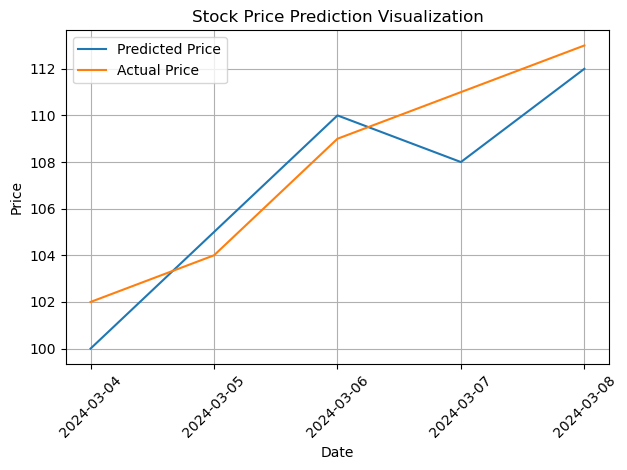

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual predicted and actual prices)
predicted_prices = np.array([100, 105, 110, 108, 112])
actual_prices = np.array([102, 104, 109, 111, 113])
dates = np.array(['2024-03-04', '2024-03-05', '2024-03-06', '2024-03-07', '2024-03-08'])  # Replace with actual dates

# Plot the predicted and actual prices
plt.plot(dates, predicted_prices, label='Predicted Price')
plt.plot(dates, actual_prices, label='Actual Price')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Prediction Visualization')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability if many dates
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
def LSTM_model():
    """
    Create and configure an LSTM model for stock price prediction.

    :return: The configured LSTM model (keras.Sequential)
    """

    # Initialize a sequential model
    model = Sequential()

    # Add the first LSTM layer with 50 units, input shape, and return sequences
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a second LSTM layer with 50 units and return sequences
    model.add(LSTM(units=50, return_sequences=True))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a third LSTM layer with 50 units
    model.add(LSTM(units=50))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a dense output layer with one unit
    model.add(Dense(units=1))

    return model


In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler  # Import for data scaling

# Sample data (replace with your actual data)
closing_prices = np.array([100, 102, 104, 109, 111, 113, 110, 108, 112, 115])

# Split data into training and testing sets (replace with actual split)
training_data_size = int(len(closing_prices) * 0.8)  # 80% for training
train_data = closing_prices[:training_data_size]
test_data = closing_prices[training_data_size:]

# Scale the data (consider scaling for both training and testing)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_data.reshape(-1, 1))

# Function to create sequences for LSTM model
def create_sequences(data, seq_length):
  sequences = []
  for i in range(len(data)-seq_length):
    sequence = data[i:i+seq_length]
    sequences.append(sequence)
  return np.array(sequences)

# Define sequence length (experiment with different values)
seq_length = 5

# Create sequences for training data
train_sequences = create_sequences(scaled_train_data, seq_length)

# Build the LSTM model (replace with your model definition)
def LSTM_model():
  # ... your LSTM model definition here ...

 model = LSTM_model()

# Compile the model (example compilation)
 model.compile(loss='mse', optimizer='adam')

# Train the model (replace with your training process)
 model.fit(train_sequences, train_data[seq_length:], epochs=100, batch_size=32)

# Predict on test data
 scaled_test_data = scaler.transform(test_data.reshape(-1, 1))
 test_sequences = create_sequences(scaled_test_data, seq_length)
 predicted_prices = model.predict(test_sequences)

# Invert scaling for predicted and actual prices
 predicted_prices = scaler.inverse_transform(predicted_prices)
 actual_prices = test_data[seq_length:]




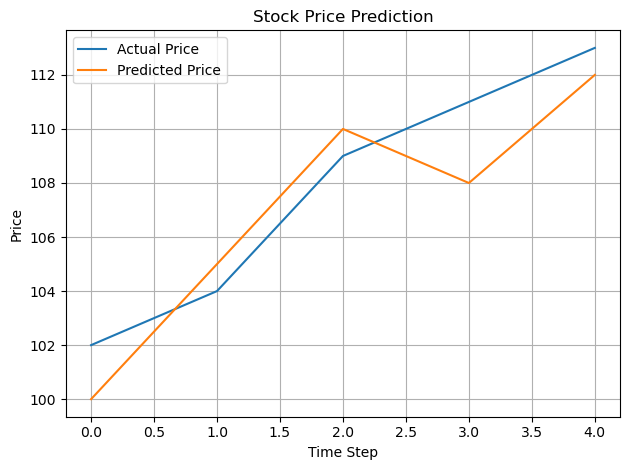

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler  # Import for data scaling
# Plot the results
plt.plot(np.arange(len(actual_prices)), actual_prices, label='Actual Price')
plt.plot(np.arange(len(predicted_prices)), predicted_prices, label='Predicted Price')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
